In [40]:
from ants import get_ants_data, image_read, resample_image, get_mask, registration, apply_transforms, from_numpy, image_write
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import os



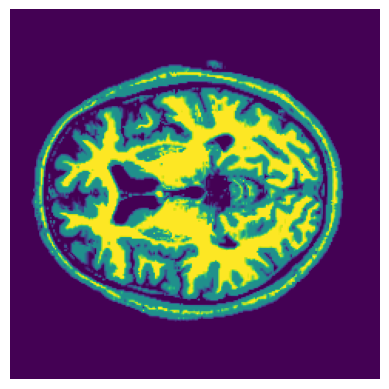

In [44]:
# Read the fixed and moving images
fixed_image = image_read("../../images/1/FLAIR.nii.gz")
moving_image = image_read("../../temp_images/T1.nii.gz")

# Perform rigid registration
transform = registration(fixed=fixed_image, moving=moving_image, type_of_transform='Rigid')

# Apply the transformation to the moving image
registered_image = apply_transforms(fixed=fixed_image, moving=moving_image, transformlist=transform['fwdtransforms'])

# Convert the registered image to a NumPy array
registered_array = registered_image.numpy()

# Plot the registered image using plt.imshow()
plt.imshow(registered_array[:,:,20])
plt.axis('off')
plt.show()

# # Save the registered image
image_write(registered_image, "registered_image.nii.gz")